# Check atmospheric simulation
=======================================================================

- Sylvie Dagoret-Campagne
- update 05 April 2018


In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
from astropy.io import fits
import numpy as np

In [47]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [49]:
path='../test'
filename='spectrasim_20170530_213.fits'

In [50]:
fullfilename=os.path.join(path,filename)

In [51]:
hdu= fits.open(fullfilename) 

In [52]:
hdr=hdu[0].header
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  804                                                  
NAXIS2  =                   76                                                  
ATMSIM  = 'libradtran'                                                          
SIMVERS = '2.0.1   '                                                            
DATAFILE= 'reduc_20170530_213.fits'                                             
SIMUFILE= 'atmsim_20170530_213.fits'                                            
AIRMASS =                1.094                                                  
PRESSURE=                  782                                                  
TEMPERAT=                  9.5                                                  
NBATMPTS=                   

In [53]:
data=hdu[0].data

# Decode indexes

In [54]:
filenamedata=hdr['DATAFILE']
filenamesim=hdr['SIMUFILE']
            
am=hdr['AIRMASS']
P=hdr['PRESSURE']
T=hdr['TEMPERAT']
NB_ATM_Points=hdr['NBATMPTS']
        
NB_AER_POINTS=hdr['NBAERPTS']
AER_MIN=hdr['AERMIN']
AER_MAX=hdr['AERMAX']

NB_PWV_POINTS=hdr['NBPWVPTS']
PWV_MIN=hdr['PWVMIN']
PWV_MAX=hdr['PWVMAX'] 
        
NB_OZ_POINTS=hdr['NBOZPTS']
OZ_MIN=hdr['OZMIN'] 
OZ_MAX=hdr['OZMAX']  


NBWLBINS=hdr['NBWLBIN']
WLMIN=hdr['WLMIN']
WLMAX=hdr['WLMAX']
    
index_atm_count=hdr['IDX_CNT']
index_atm_aer=hdr['IDX_AER']
index_atm_pwv=hdr['IDX_PWV']
index_atm_oz=hdr['IDX_OZ']
index_atm_data=hdr['IDX_DATA']

# Wavelengths

In [55]:
WL=data[0,index_atm_data:]

In [56]:
WL.shape

(800,)

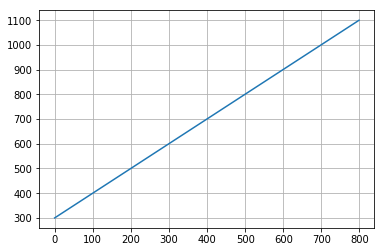

In [57]:
plt.plot(WL)
plt.grid()

# check aerosols

In [58]:
indexes_aer=np.where(np.logical_and(data[:,index_atm_pwv]==5.0, data[:,index_atm_oz]==300.))[0]

In [59]:
aer_values=data[indexes_aer,index_atm_aer]
aer_values

array([0.   , 0.025, 0.05 , 0.075, 0.1  ])

In [60]:
aer_data=data[indexes_aer,index_atm_data:]

In [61]:
aer_data.shape

(5, 800)

Text(0.5,1,u'Aerosols Variation')

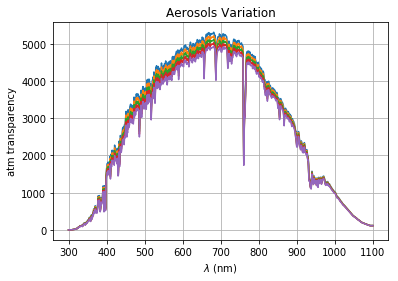

In [62]:
for idx,aer in np.ndenumerate(aer_values):
    plt.plot(WL, aer_data[idx[0],:])
plt.grid()
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("ADU")
plt.title("Aerosols Variation")

# Check precipitable water vapor

In [63]:
indexes_pwv=np.where(np.logical_and(data[:,index_atm_aer]==0, data[:,index_atm_oz]==300.))[0]

In [64]:
pwv_values=data[indexes_pwv,index_atm_pwv]
pwv_values

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [65]:
pwv_data=data[indexes_pwv,index_atm_data:]

Text(0.5,1,u'PWV Variation')

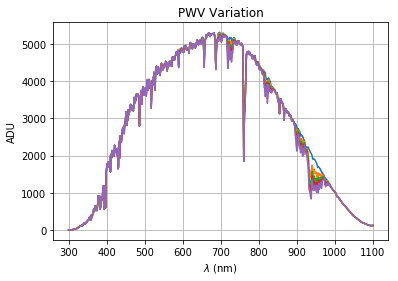

In [79]:
for idx,pwv in np.ndenumerate(pwv_values):
    plt.plot(WL, pwv_data[idx[0],:])
plt.grid()
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("ADU")
plt.title("PWV Variation")

## Check Ozone

In [67]:
indexes_oz=np.where(np.logical_and(data[:,index_atm_aer]==0, data[:,index_atm_pwv]==5.))[0]

In [68]:
oz_values=data[indexes_oz,index_atm_oz]
oz_values

array([200., 300., 400.])

In [69]:
oz_data=data[indexes_oz,index_atm_data:]

In [70]:
oz_data.shape

(3, 800)

Text(0.5,1,u'Ozone Variation')

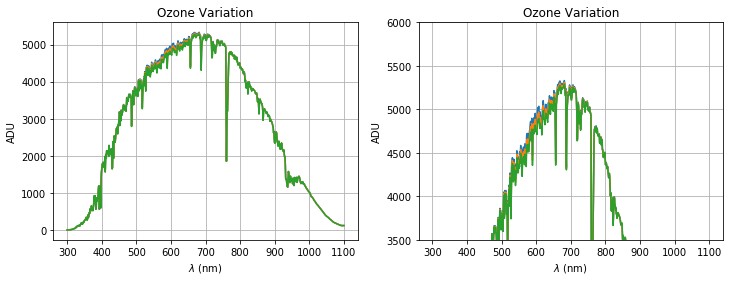

In [83]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
for idx,oz in np.ndenumerate(oz_values):
    plt.plot(WL, oz_data[idx[0],:])
plt.grid()
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("ADU")
#plt.ylim(3000.,6000.)
plt.title("Ozone Variation")

plt.subplot(1, 2, 2)
for idx,oz in np.ndenumerate(oz_values):
    plt.plot(WL, oz_data[idx[0],:])
plt.grid()
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("ADU")
plt.ylim(3500.,6000.)
plt.title("Ozone Variation")

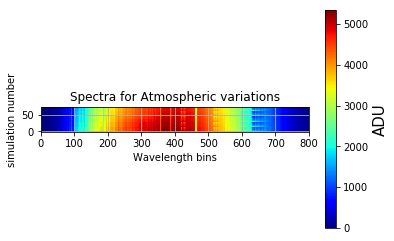

In [72]:
    img=plt.imshow(data[1:,index_atm_data:],origin='lower',cmap='jet')
plt.xlabel("Wavelength bins")
plt.ylabel("simulation number")
plt.title("Spectra for Atmospheric variations")
cbar=plt.colorbar(img)
cbar.set_label('ADU',size=15)
plt.grid(True)